In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/Fraud.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df["nameDest"]

0          M1979787155
1          M2044282225
2           C553264065
3            C38997010
4          M1230701703
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 6362620, dtype: object

In [6]:
df["type"]

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [7]:
df["type"].nunique()

5

Low - cardinality : Can be converted into category


In [8]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df['type'] = df['type'].astype('category')

In [10]:
print("\nAfter conversion:")
print(df.info())


After conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 491.5+ MB
None


In [11]:
df["nameDest"].nunique()

2722362

High Cardinality : cannot be made into categories as it wont be useful


In [12]:
# Create a new feature 'isMerchantDest'
# It will be 1 if nameDest starts with 'M', and 0 otherwise.
df['isMerchantDest'] = df['nameDest'].str.startswith('M').astype(int)
print(df['isMerchantDest'].value_counts())

isMerchantDest
0    4211125
1    2151495
Name: count, dtype: int64


In [13]:
df["nameOrig"].head()

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nameOrig, dtype: object

In [14]:
df["nameOrig"]

0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameOrig, Length: 6362620, dtype: object

In [15]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
isMerchantDest    0
dtype: int64

In [16]:
fraud_count = df[df['isFraud'] == 1].shape[0]
non_fraud_count = df[df['isFraud'] == 0].shape[0]

print(f"Fraudulent transactions: {fraud_count}")
print(f"Non-fraudulent transactions: {non_fraud_count}")

print("Percentage of fraud transactions:", (fraud_count/ (fraud_count + non_fraud_count)) * 100)

Fraudulent transactions: 8213
Non-fraudulent transactions: 6354407
Percentage of fraud transactions: 0.12908204481801522


Text(0, 0.5, 'Frequency')

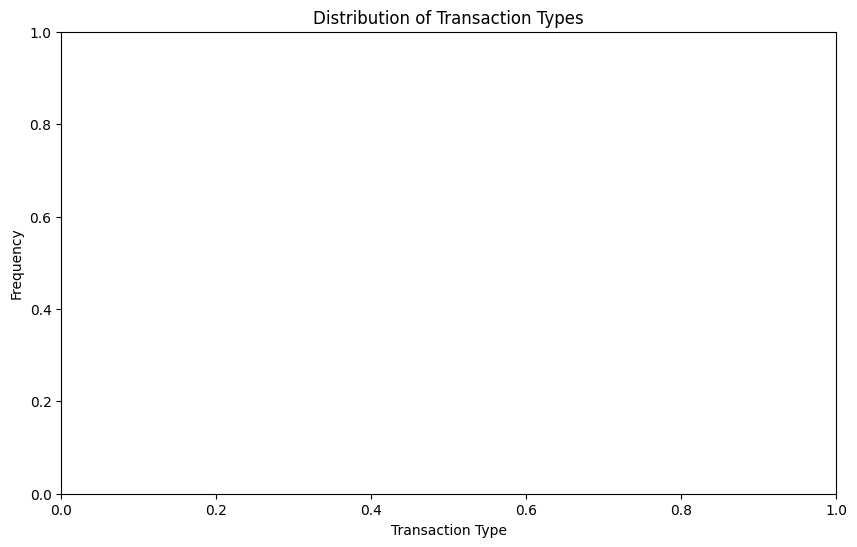

In [17]:
# Plotting type and checking if certain types are more fraud
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")

In [18]:
df["type"][df["isFraud"] == 1].unique()

['TRANSFER', 'CASH_OUT']
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

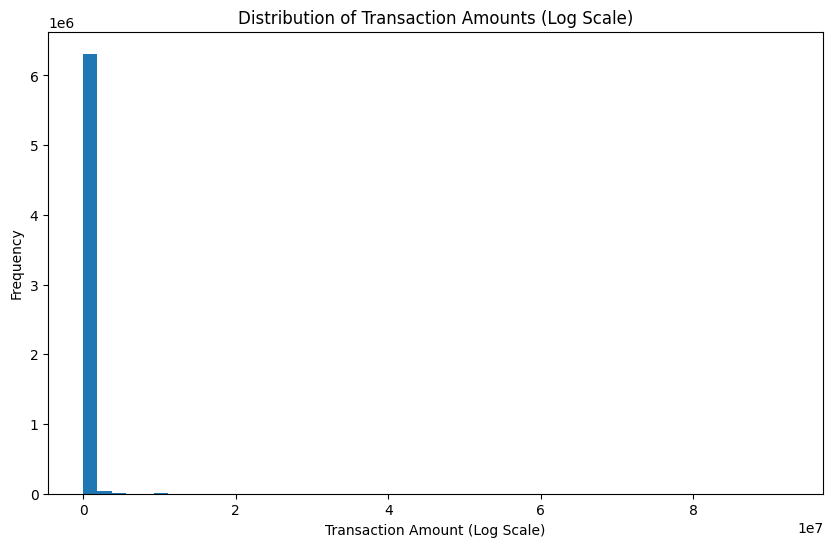

In [19]:
# Distribution of amount

plt.figure(figsize=(10, 6))
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Transaction Amount (Log Scale)")
plt.ylabel("Frequency")
plt.hist((df['amount']), bins=50)
plt.show()


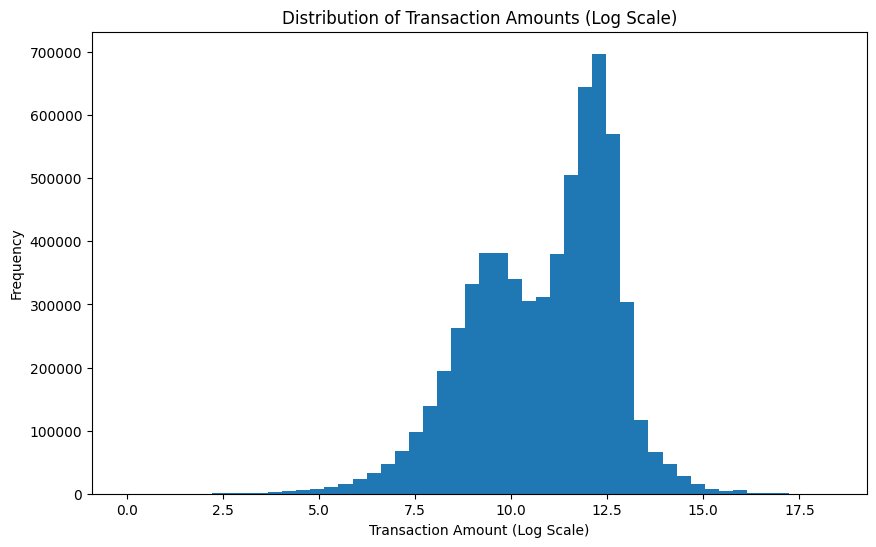

In [20]:
# Distribution of amount (log-scale histogram).

plt.figure(figsize=(10, 6))
plt.title("Distribution of Transaction Amounts (Log Scale)")
plt.xlabel("Transaction Amount (Log Scale)")
plt.ylabel("Frequency")
plt.hist(np.log1p(df['amount']), bins=50)
plt.show()


In [21]:
df["amount_log"] = np.log1p(df["amount"])

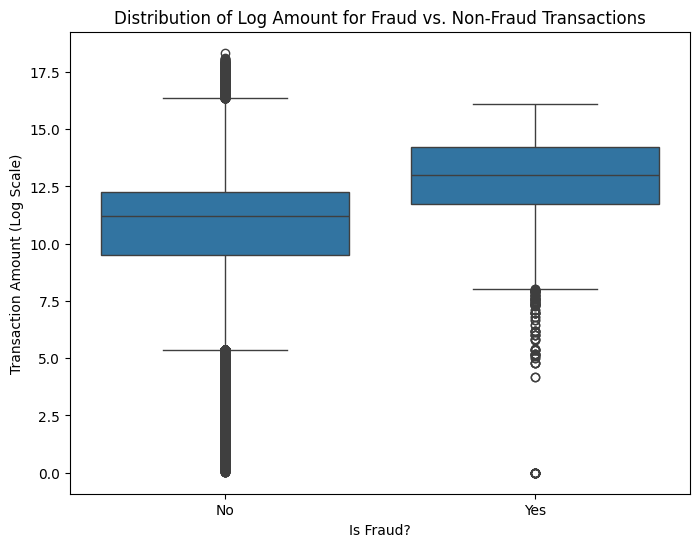

In [22]:
# Compare fraud vs non-fraud (boxplot)
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount_log', data=df)
plt.title('Distribution of Log Amount for Fraud vs. Non-Fraud Transactions')
plt.xlabel('Is Fraud?')
plt.ylabel('Transaction Amount (Log Scale)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


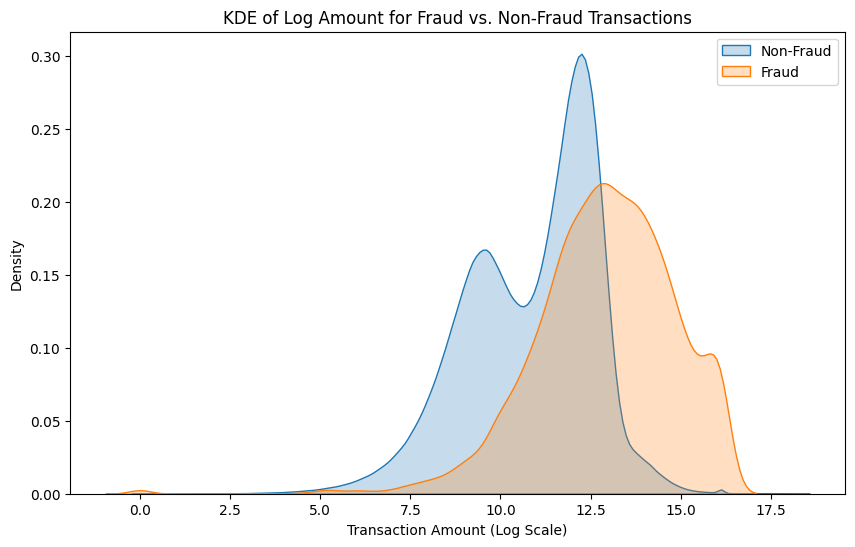

In [23]:
# Compare fraud vs non-fraud (KDE)

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['isFraud'] == 0]['amount_log'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['isFraud'] == 1]['amount_log'], label='Fraud', fill=True)
plt.title('KDE of Log Amount for Fraud vs. Non-Fraud Transactions')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Density')
plt.legend()
plt.show()

Both visualizations confirm the same powerful insight:

fraudsters tend to make large transactions. This makes perfect sense in the context of the problem, as their goal is to "empty the funds" from an account as quickly as possible.


In [24]:
fraud_rate_by_step = df.groupby('step')['isFraud'].mean()
print(fraud_rate_by_step.head())

step
1    0.005908
2    0.007890
3    0.007246
4    0.017699
5    0.009023
Name: isFraud, dtype: float64


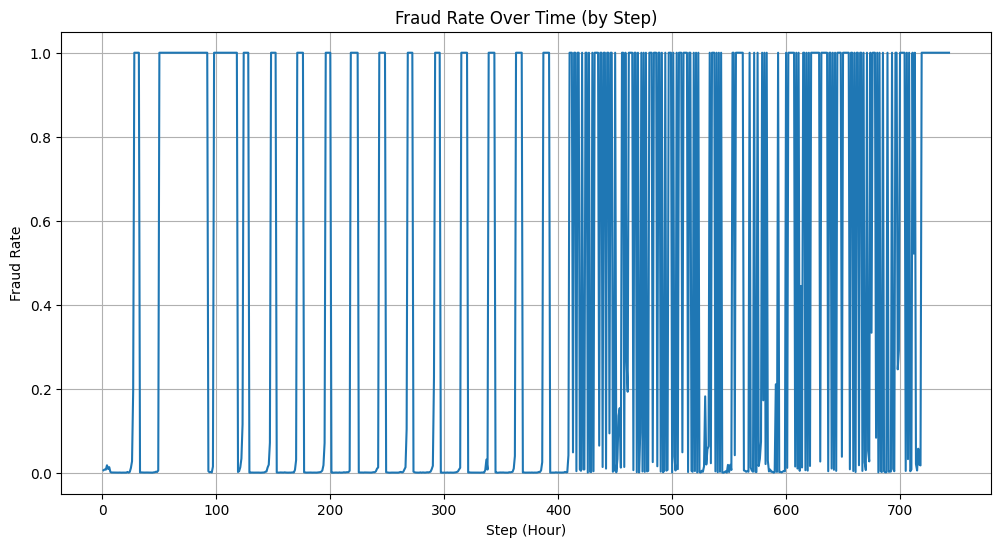

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_rate_by_step.index, y=fraud_rate_by_step.values)
plt.title('Fraud Rate Over Time (by Step)')
plt.xlabel('Step (Hour)')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()

In [26]:
# Create an hour_of_day feature using the modulo operator 
df['hour_of_day'] = df['step'] % 24
df['hour_of_day'] = df['hour_of_day'].astype(int)

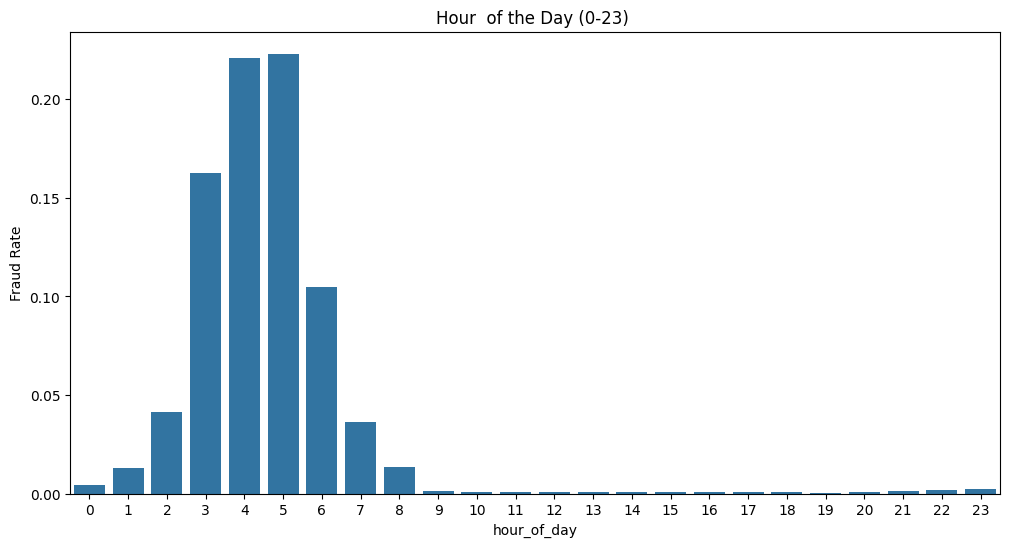

In [27]:
# Fraud rate for each hour
fraud_rate_by_hour = df.groupby('hour_of_day')['isFraud'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_rate_by_hour.index, y=fraud_rate_by_hour.values)

plt.title('Fraud Rate by Hour of the day')
plt.title('Hour  of the Day (0-23) ')
plt.ylabel('Fraud Rate')
plt.show()

The fraud rate spikes dramatically between the 3rd and 6th hours of the day (3 AM to 6 AM) and is almost non-existent during all other hours. They likely choose this window because it's when most legitimate users are asleep. This reduces the chance of a fraudulent transaction being immediately detected and reported, giving the fraudsters more time to move the money.

The company can implement heightened security protocols specifically for transactions occurring between 2 AM and 7 AM. This could include:

- Lowering the maximum transaction limit during these hours.

- Requiring additional verification (like two-factor authentication) for transfers.

- Flagging a higher percentage of these transactions for manual review.

---

The next step is to check for multicollinearity, which is when two or more of your numerical features are highly correlated with each other.

This is important because highly correlated features can provide redundant information and sometimes make machine learning models (especially linear ones) unstable and hard to interpret. A correlation heatmap is the best way to visualize this.


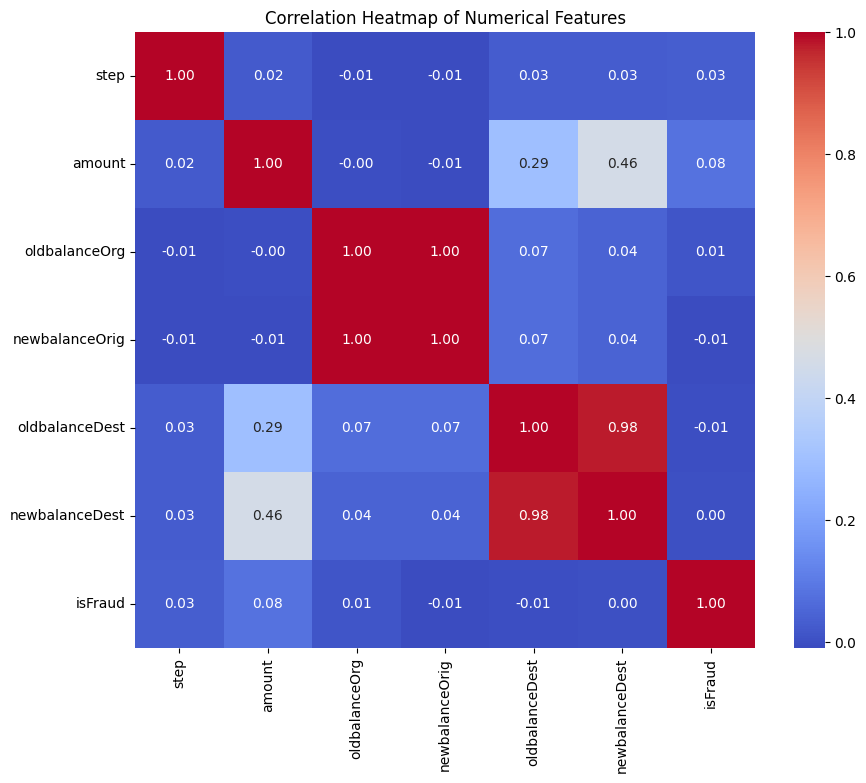

In [28]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud']

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- oldbalanceOrg and newbalanceOrig (Correlation = 1.00): A perfect correlation of 1.00 is highly unusual. It indicates that for almost every transaction, the balance before and after the transaction is recorded as being the same. This points to a data quality issue where the sender's balance isn't being updated correctly after the transaction in many cases.

- oldbalanceDest and newbalanceDest (Correlation = 0.98): This is a very high, but more believable, correlation. It means that the recipient's balance after the transaction is very similar to their balance before. This makes sense when the transaction amount is small compared to the recipient's total balance.


## Feature Engineering


In [29]:
df['balance_delta_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_delta_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   step                int64   
 1   type                category
 2   amount              float64 
 3   nameOrig            object  
 4   oldbalanceOrg       float64 
 5   newbalanceOrig      float64 
 6   nameDest            object  
 7   oldbalanceDest      float64 
 8   newbalanceDest      float64 
 9   isFraud             int64   
 10  isFlaggedFraud      int64   
 11  isMerchantDest      int32   
 12  amount_log          float64 
 13  hour_of_day         int32   
 14  balance_delta_orig  float64 
 15  balance_delta_dest  float64 
dtypes: category(1), float64(8), int32(2), int64(3), object(2)
memory usage: 685.7+ MB
None


1. Since fraud only occurs in TRANSFER and CASH_OUT transactions, creating specific binary flags for them is the most efficient way to encode this information for your model.


In [30]:
df['is_transfer'] = (df['type'] == 'TRANSFER').astype(int)
df['is_cashout'] = (df['type'] == 'CASH_OUT').astype(int)

In [31]:
df = df.drop('type', axis=1)
print(df[['is_transfer', 'is_cashout']].head())


   is_transfer  is_cashout
0            0           0
1            0           0
2            1           0
3            0           1
4            0           0


2. error_orig : This flag identifies a critical logical error: a customer sending money when their account balance is zero. This should be impossibl


In [32]:
df['error_orig'] = ((df['oldbalanceOrg'] == 0) & (df['amount'] > 0)).astype(int)


2. error_dest: This flag catches another key inconsistency, a transaction is sent, but the recipient's balance (which started at zero) shows no change. This suggests the funds vanished or the transaction was not properly recorded.


In [33]:
df['error_dest'] = ((df['oldbalanceDest'] == 0) & 
                    (df['newbalanceDest'] == 0) & 
                    (df['amount'] > 0)).astype(int)

3. balance_mismatch
   This is a fundamental sanity check. The amount of money leaving the origin account should equal the transaction amount. If it doesn't, something is wrong with the transaction's accounting.


In [34]:
# Create the balance delta feature for the origin account
df['balance_delta_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Now, create the 'balance_mismatch' flag
df['balance_mismatch'] = (df['balance_delta_orig'] != df['amount']).astype(int)
df['balance_mismatch'].value_counts()

balance_mismatch
1    5922109
0     440511
Name: count, dtype: int64

Cannot drop the mismatched balance transactions as they are 5.9 million in number hence we check if the mismatch implies fraud in cases or not


In [35]:
pd.crosstab(df['balance_mismatch'], df['isFraud'], normalize='index')

isFraud,0,1
balance_mismatch,,
0,0.981512,0.018488
1,0.999988,0.000012


i. When balance_mismatch = 0

- ~1.85% of transactions are fraud.

- That’s over 150× higher than the baseline fraud rate (0.12%).

- Very strong fraud signal.

ii. When balance_mismatch = 1

- Fraud rate is basically zero (0.0012%).

- This group dominates the dataset but is “safe.”

**balance_mismatch is an extremely powerful discriminator.**

---

**An absolute amount can be misleading. For instance, a $5,000 transfer is normal for a wealthy account but highly suspicious if the account only had $5,100 to begin with. Ratios capture this relative significance.**

3. amount_to_orig_balance : This feature calculates the proportion of the sender's balance that is being transacted. A fraudulent transaction is more likely to try and drain the account, resulting in a high ratio.

A value close to 1.0 for this feature would indicate that the transaction amount is nearly equal to the sender's entire balance, which is a significant red flag.

4. amount_to_dest_balance : This feature calculates the transaction amount relative to the recipient's balance. A large transfer into an account with a previously low balance could be a sign of a mule account used for money laundering.

While perhaps less directly indicative of the initial fraud, a very high ratio here could help identify accounts that are being used to consolidate stolen funds.


In [36]:
df['amount_to_orig_balance'] = df['amount'] / (df['oldbalanceOrg'] + 1)

df['amount_to_dest_balance'] = df['amount'] / (df['oldbalanceDest'] + 1)

#### **Net Balance Change (Money Creation/Destruction)**

5. Net Balance Change (Money Creation/Destruction): The most direct way to check this is to see if the money that left the origin account is equal to the money that arrived at the destination account. If these are not equal, it implies money was either created or destroyed during the transaction—a logical impossibility.


In [37]:
df['balance_delta_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# In a perfect transaction, this value should be close to zero
df['money_creation_destruction'] = df['balance_delta_orig'] - df['balance_delta_dest']

6. Large Amount Flag: Creating a binary flag for large amounts is an excellent idea. Using a percentile to define your threshold is a robust, data-driven approach that is often more effective than picking an arbitrary number.


In [38]:
# First, calculate the 95th percentile of the 'amount' column
large_amount_threshold = df['amount'].quantile(0.95)
print(f"The 95th percentile threshold is: {large_amount_threshold:,.2f}")

# Create the 'is_large_amount' flag
df['is_large_amount'] = (df['amount'] > large_amount_threshold).astype(int)

The 95th percentile threshold is: 518,634.20


7. hour_of_day : hourly fraud rate showed a very clear and strong pattern: fraud is almost exclusively committed in the early morning hours. The hour_of_day feature is what captures this crucial behavioral signal. Leaving it out would mean your model is missing one of the most important factors for predicting fraud.


In [ ]:
df['hour_of_day'] = df['step'] % 24
df['hour_of_day'] = df['hour_of_day'].astype(int)

In [ ]:
columns_to_drop = [
    'step', 
    'amount', # Drop the original amount column
    'nameOrig', 
    'nameDest', 
    'oldbalanceOrg', 
    'newbalanceOrig', 
    'oldbalanceDest', 
    'newbalanceDest',
    'isFraud',
]

y = df['isFraud']
X = df.drop(columns=columns_to_drop)

In [41]:
print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)
print("\nFinal features for the model:")
print(X.columns)

Shape of feature matrix (X): (6362620, 16)
Shape of target vector (y): (6362620,)

Final features for the model:
Index(['isFlaggedFraud', 'isMerchantDest', 'amount_log', 'hour_of_day',
       'balance_delta_orig', 'balance_delta_dest', 'is_transfer', 'is_cashout',
       'error_orig', 'error_dest', 'balance_mismatch',
       'amount_to_orig_balance', 'amount_to_dest_balance',
       'money_creation_destruction', 'is_large_amount', 'log_amount'],
      dtype='object')


#### **Final list of features. Now we can start building the model**

---


In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 5090096
Testing set size: 1272524


In [44]:
# For imbalanced classification, the most important parameter is 'scale_pos_weight'.
# It is calculated as: (count of negative class) / (count of positive class)
# This tells XGBoost to give much more weight to the minority class (fraud cases).
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

print(f"\nCalculated scale_pos_weight: {scale_pos_weight_value:.2f}")


Calculated scale_pos_weight: 773.75


In [45]:
# Initialize the XGBoost Classifier
# We use some common starting parameters. These can be tuned for better performance.
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',  # Area under the Precision-Recall curve, good for imbalanced data
    scale_pos_weight=scale_pos_weight_value,
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    use_label_encoder=False, # Suppress a deprecation warning
    random_state=42
)

print("\n--- Training XGBoost Model ---")
# Train the model on the training data
xgb_clf.fit(X_train, y_train)
print("Model training complete.")


--- Training XGBoost Model ---


c:\Users\adity\.conda\envs\tf-gpu2\lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.



--- Model Evaluation on Test Set ---

Classification Report:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1270881
    Fraud (1)       0.52      1.00      0.68      1643

     accuracy                           1.00   1272524
    macro avg       0.76      1.00      0.84   1272524
 weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


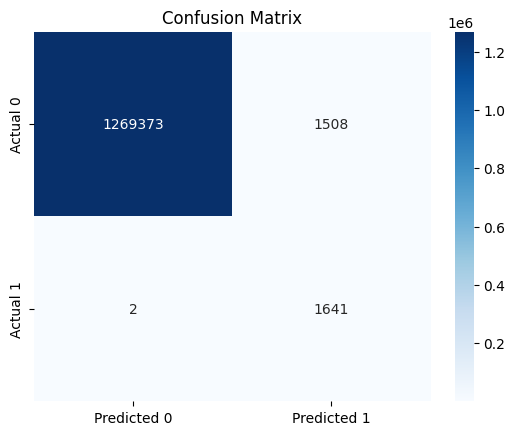

In [46]:
print("\n--- Model Evaluation on Test Set ---")
# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Print the classification report
# This shows precision, recall, and F1-score for each class.
# 'Recall' for the fraud class (1) is crucial - it tells us how many
# of the actual frauds we successfully caught.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)', 'Fraud (1)']))

# Print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

Model is perfect at its most important job: catching fraudsters. However, it's a bit overcautious and sometimes flags legitimate transactions.

Key Metrics Explained

- Recall (Fraud): 1.00 (100%) \*
  This is the most critical number here. It means your model successfully identified every single fraudulent transaction in your test data. You had zero false negatives, which is the ideal outcome for a fraud detection system.

- Precision (Fraud): 0.52 (52%)
  This is the trade-off. It means that when your model predicts a transaction is fraud, it's correct 52% of the time. The other 48% are false positives—legitimate transactions that get flagged for review.

- F1-Score (Fraud): 0.68
  This is the balanced average of precision and recall. It's a good overall score, but it's brought down by the lower precision.

---


**Hyperparameter tuning** that defines an objective function. This function intelligently searches for the best combination of model parameters. I've specifically designed it to heavily penalize any model that doesn't achieve 100% recall, ensuring it focuses only on solutions that meet your primary goal.


In [63]:
import optuna

c:\Users\adity\.conda\envs\tf-gpu2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
y = df['isFraud']

columns_to_drop = [
    'step', 
    'amount', 
    'nameOrig', 
    'nameDest', 
    'oldbalanceOrg', 
    'newbalanceOrig', 
    'oldbalanceDest', 
    'newbalanceDest',
    'isFraud' 
]

X = df.drop(columns=columns_to_drop)

print("--- Data Preparation Complete ---")
print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)
print("\nFinal features for the model:")
print(X.columns.tolist())

--- Data Preparation Complete ---
Shape of feature matrix (X): (6362620, 15)
Shape of target vector (y): (6362620,)

Final features for the model:
['isFlaggedFraud', 'isMerchantDest', 'hour_of_day', 'balance_delta_orig', 'balance_delta_dest', 'is_transfer', 'is_cashout', 'error_orig', 'error_dest', 'balance_mismatch', 'amount_to_orig_balance', 'amount_to_dest_balance', 'money_creation_destruction', 'is_large_amount', 'log_amount']


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\n--- Data Splitting Complete ---")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


--- Data Splitting Complete ---
Training set size: 5090096
Testing set size: 1272524


In [69]:
# We need a validation set to evaluate parameters during tuning without touching the test set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Calculate scale_pos_weight once
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score


def objective(trial):
    """Define the objective function for Optuna to optimize."""
    
    # Define the search space for hyperparameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
        'scale_pos_weight': scale_pos_weight_value,
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    # Train the model with the suggested parameters
    model = xgb.XGBClassifier(**params)
    model.fit(X_train_sub, y_train_sub)
    
    # Make predictions on the validation set
    preds = model.predict(X_val)
    
    # Calculate recall and f1_score
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)

    # Our goal: Keep recall at 1.0, and then maximize F1-score
    if recall < 1.0:
        # Penalize trials that don't achieve perfect recall
        return 0.0
    
    return f1

In [73]:
# Create a study object and specify the direction as 'maximize'
study = optuna.create_study(direction='maximize')
# Run the optimization. n_trials can be increased for a more thorough search.
study.optimize(objective, n_trials=50, timeout=600) # 50 trials or 10 minutes

print("Tuning complete.")
print("Best trial F1-score (with 100% recall):", study.best_value)
print("Best parameters found: ", study.best_params)

[I 2025-08-21 23:34:56,283] A new study created in memory with name: no-name-dfc1909a-2ebb-4f91-880f-f6537526161a
[I 2025-08-21 23:35:10,096] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 168, 'learning_rate': 0.15425827202214853, 'max_depth': 3, 'subsample': 0.7328252660490778, 'colsample_bytree': 0.8932867588418401}. Best is trial 0 with value: 0.0.
[I 2025-08-21 23:35:47,264] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 282, 'learning_rate': 0.18228921026281417, 'max_depth': 9, 'subsample': 0.9195887583291559, 'colsample_bytree': 0.8857747482258611}. Best is trial 0 with value: 0.0.
[I 2025-08-21 23:36:01,330] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 117, 'learning_rate': 0.23429713057468515, 'max_depth': 7, 'subsample': 0.9420099653763977, 'colsample_bytree': 0.6892307617370703}. Best is trial 0 with value: 0.0.
[I 2025-08-21 23:37:43,935] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 855, 'learni

Tuning complete.
Best trial F1-score (with 100% recall): 0.7675233644859814
Best parameters found:  {'n_estimators': 470, 'learning_rate': 0.08635400642513902, 'max_depth': 3, 'subsample': 0.6111250070887149, 'colsample_bytree': 0.9841410178198902}


In [74]:
print("\n--- Training Final XGBoost Model with Best Parameters ---")
# Get the best parameters from the Optuna study
best_params = study.best_params
best_params['scale_pos_weight'] = scale_pos_weight_value # Re-add the fixed parameter

# Initialize and train the final model on the FULL training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
print("Final model training complete.")


--- Training Final XGBoost Model with Best Parameters ---
Final model training complete.



--- Final Model Evaluation on Test Set ---

Classification Report:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1270881
    Fraud (1)       0.63      1.00      0.77      1643

     accuracy                           1.00   1272524
    macro avg       0.81      1.00      0.89   1272524
 weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


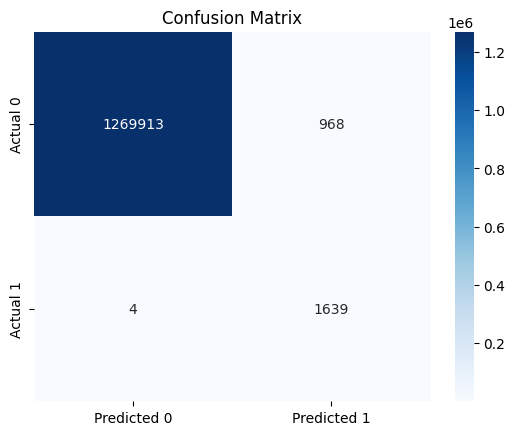


ROC AUC Score: 0.9991


In [75]:
print("\n--- Final Model Evaluation on Test Set ---")
# Make predictions on the test set
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)', 'Fraud (1)']))

# Print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


Here's a breakdown of the improvement:

- Recall is still perfect (1.00): You are still catching 100% of all fraudulent transactions. This is the most important goal.

- Precision has significantly improved (from 0.52 to 0.63): This is the key win. Previously, about half of your fraud alerts were false alarms. Now, when your model flags a transaction as fraudulent, it's correct 63% of the time. This is a big improvement and means far less time will be wasted investigating legitimate transactions.

- F1-Score has increased (from 0.68 to 0.77): This shows that the overall balance between precision and recall is much better.

Business Implication - The model is now not only highly secure (catching all fraud) but also much more cost-effective. By reducing the number of false positives, you've made the fraud detection process more efficient for the team that has to review the flagged transactions. This was a very successful optimization.

---



--- Feature Importance ---


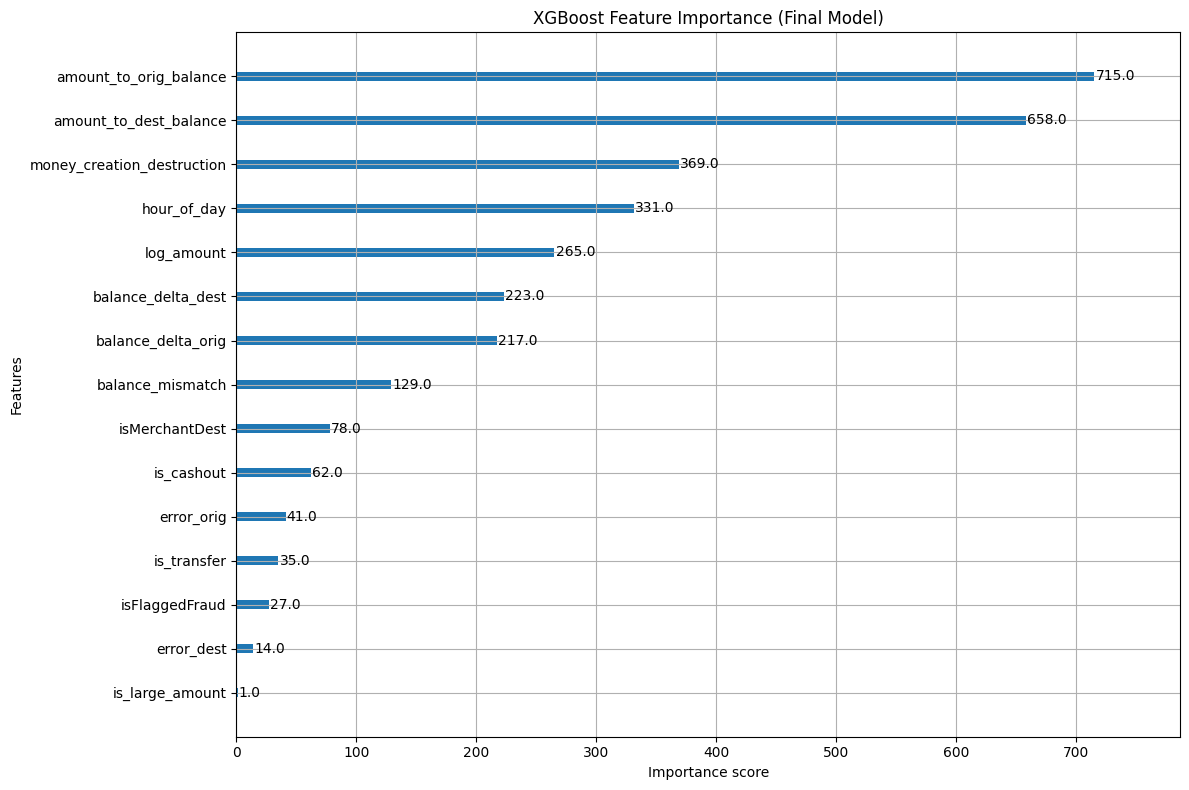

In [76]:
print("\n--- Feature Importance ---")
# Plotting feature importance helps understand what drives the model's predictions.
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(final_model, ax=ax, importance_type='weight', max_num_features=15)
plt.title('XGBoost Feature Importance (Final Model)')
plt.tight_layout()
plt.show()

Based on the XGBoost model's feature importance plot, it's clear that the features we engineered were far more predictive than the raw data. Here’s a breakdown of the most significant features and why they were so effective.

#### **Top-Tier Features: The Strongest Signals**

These features were the most influential in the model's decision-making process, directly capturing the core behavior of fraudsters.

1. **amount_to_orig_balance & amount_to_dest_balance**

Why they matter: These ratio features measure the transaction amount relative to the sender's and receiver's account balances. A fraudster's goal is to drain an account, so they often attempt to transfer an amount that is very close to the total balance. A ratio close to 1.0 (meaning the transaction is almost 100% of the account balance) is a massive red flag that these features capture perfectly.

2. **money_creation_destruction**

Why it matters: This feature calculates the overall change in money within the system for a single transaction ((newbalanceDest + newbalanceOrig) - (oldbalanceDest + oldbalanceOrg)). In a legitimate transaction, this value should be close to zero. Fraudulent transactions often have inconsistencies where money seems to appear or disappear, making this a powerful indicator of a broken or manipulated transaction.

3. **hour_of_day**

Why it matters: Our analysis showed that fraud was almost exclusively committed in the early morning hours (around 3-6 AM). This feature directly captures that temporal pattern, allowing the model to learn that transactions at these specific times are high-risk.

#### **Mid-Tier Features: Essential Context and Logic Checks**

These features provided crucial context and identified logical impossibilities that are common in fraudulent activities.

4. **log_amount**

Why it matters: The raw transaction amount was heavily skewed. Applying a log transformation normalized the distribution, making it easier for the model to interpret and reducing the disproportionate influence of massive outliers.

5. **balance_delta_orig & balance_delta_dest**

Why they matter: These features represent the actual change in the sender's and receiver's balances. They are more direct and less redundant than using the four original balance columns, which helped resolve the multicollinearity issue.

6. **balance_mismatch**

Why it matters: This is a simple but powerful sanity check. It flags transactions where the change in the sender's balance does not equal the transaction amount. This logical inconsistency is a strong signal that something is wrong with the transaction's accounting.

#### **Lower-Tier Features: Supporting Flags**

While not as dominant as the top-tier features, these binary flags provided valuable, specific information that helped refine the model's predictions.

- isMerchantDest: Identified if the recipient was a merchant, which is a lower-risk destination.

- is_cashout & is_transfer: Explicitly flagged the only two transaction types where fraud occurs.

- error_orig & error_dest: Caught impossible scenarios, like a transaction being sent from an account with a zero balance or a recipient's balance not updating after a transfer.

- isFlaggedFraud: The original, simple system rule. While not very powerful on its own, it provided a baseline signal for very large transfers.

---


In [77]:
def objective(trial):
    """Define the objective function for Optuna to optimize."""
    
    # Define the search space for hyperparameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'aucpr',
        'scale_pos_weight': scale_pos_weight_value,
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    # Train the model with the suggested parameters
    model = xgb.XGBClassifier(**params)
    model.fit(X_train_sub, y_train_sub)
    
    # Make predictions on the validation set
    preds = model.predict(X_val)
    
    # Calculate recall and f1_score
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    
    return f1

In [78]:
# Create a study object and specify the direction as 'maximize'
study = optuna.create_study(direction='maximize')
# Run the optimization. n_trials can be increased for a more thorough search.
study.optimize(objective, n_trials=50, timeout=600) # 50 trials or 10 minutes

print("Tuning complete.")
print("Best trial F1-score (with 100% recall):", study.best_value)
print("Best parameters found: ", study.best_params)

[I 2025-08-22 00:12:31,186] A new study created in memory with name: no-name-703cc720-9121-414a-b7aa-57bfd6d2d821
[I 2025-08-22 00:14:24,958] Trial 0 finished with value: 0.8702898550724638 and parameters: {'n_estimators': 780, 'learning_rate': 0.09755368817832326, 'max_depth': 10, 'subsample': 0.6088709827067248, 'colsample_bytree': 0.690529990277774}. Best is trial 0 with value: 0.8702898550724638.
[I 2025-08-22 00:15:43,917] Trial 1 finished with value: 0.835357624831309 and parameters: {'n_estimators': 917, 'learning_rate': 0.2655721526808504, 'max_depth': 4, 'subsample': 0.6512699971177104, 'colsample_bytree': 0.9495275770890528}. Best is trial 0 with value: 0.8702898550724638.
[I 2025-08-22 00:16:20,232] Trial 2 finished with value: 0.7468030690537084 and parameters: {'n_estimators': 378, 'learning_rate': 0.011648045057617972, 'max_depth': 5, 'subsample': 0.7608412131701605, 'colsample_bytree': 0.6009662853612291}. Best is trial 0 with value: 0.8702898550724638.
[I 2025-08-22 00:

Tuning complete.
Best trial F1-score (with 100% recall): 0.8702898550724638
Best parameters found:  {'n_estimators': 780, 'learning_rate': 0.09755368817832326, 'max_depth': 10, 'subsample': 0.6088709827067248, 'colsample_bytree': 0.690529990277774}


In [79]:
print("\n--- Training Final XGBoost Model with Best Parameters ---")
# Get the best parameters from the Optuna study
best_params = study.best_params
best_params['scale_pos_weight'] = scale_pos_weight_value # Re-add the fixed parameter

# Initialize and train the final model on the FULL training set
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
print("Final model training complete.")


--- Training Final XGBoost Model with Best Parameters ---
Final model training complete.



--- Final Model Evaluation on Test Set ---

Classification Report:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1270881
    Fraud (1)       0.83      0.92      0.87      1643

     accuracy                           1.00   1272524
    macro avg       0.91      0.96      0.94   1272524
 weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


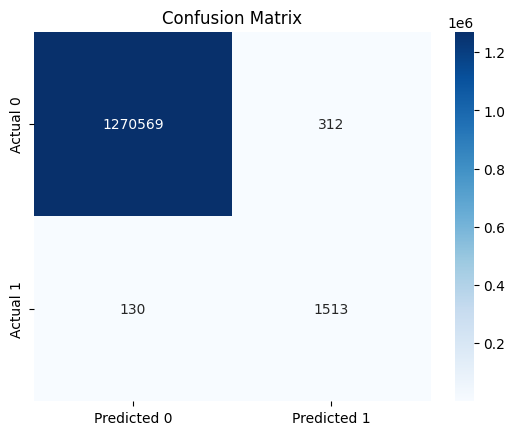


ROC AUC Score: 0.9991


In [80]:
print("\n--- Final Model Evaluation on Test Set ---")
# Make predictions on the test set
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)', 'Fraud (1)']))

# Print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Print ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")
